[M1] μ=-3.98, σ=2.18


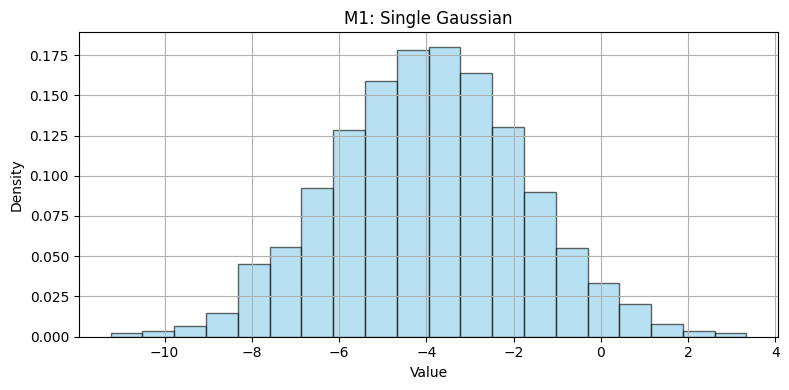

[M2] m=0.54, μ1=1.28, σ1=5.30, μ2=-3.58, σ2=2.87


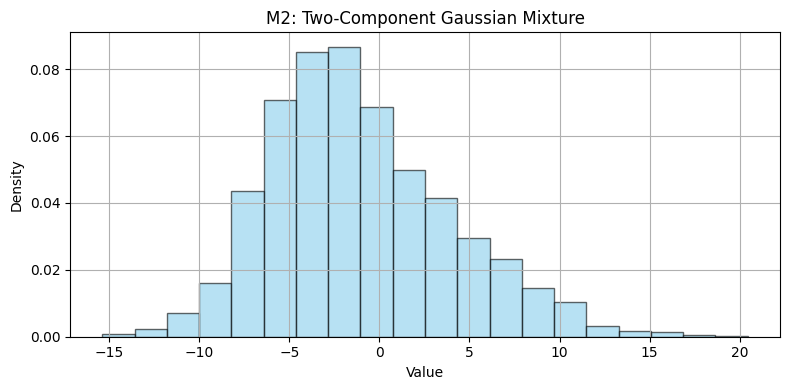

In [14]:
import numpy as np
from scipy.stats import beta as beta_dist
import matplotlib.pyplot as plt

# ----- Configurable Parameters -----
NUM_POINTS = 4000
MU_PRIOR_MEAN = 0
MU_PRIOR_STD = 4
SIGMA_PRIOR_A = 0.5
SIGMA_PRIOR_B = 2.0
MIN_MU_DISTANCE = 2.0

# ----- Helper Functions -----
def sample_single_component_prior(mu_mean=MU_PRIOR_MEAN, mu_std=MU_PRIOR_STD,
                                  sigma_a=SIGMA_PRIOR_A, sigma_b=SIGMA_PRIOR_B):
    mu = np.random.normal(mu_mean, mu_std)
    precision = np.random.gamma(shape=sigma_a, scale=1/sigma_b)
    sigma = np.sqrt(1 / precision)
    return mu, sigma

def generate_m1_sample(num_points=NUM_POINTS):
    mu, sigma = sample_single_component_prior()
    data = np.random.normal(mu, sigma, num_points)
    return data, (mu, sigma)

def sample_mixture_prior(mu_mean=MU_PRIOR_MEAN, mu_std=MU_PRIOR_STD,
                          sigma_a=SIGMA_PRIOR_A, sigma_b=SIGMA_PRIOR_B,
                          min_mu_distance=MIN_MU_DISTANCE):
    m = beta_dist.rvs(0.5, 0.5)
    mu1, sigma1 = sample_single_component_prior(mu_mean, mu_std, sigma_a, sigma_b)
    while True:
        mu2, sigma2 = sample_single_component_prior(mu_mean, mu_std, sigma_a, sigma_b)
        if abs(mu1 - mu2) >= min_mu_distance:
            break
    return m, mu1, sigma1, mu2, sigma2

def generate_m2_sample(num_points=NUM_POINTS):
    m, mu1, sigma1, mu2, sigma2 = sample_mixture_prior()
    data = np.empty(num_points)
    for i in range(num_points):
        if np.random.rand() < m:
            data[i] = np.random.normal(mu1, sigma1)
        else:
            data[i] = np.random.normal(mu2, sigma2)
    return data, (m, mu1, sigma1, mu2, sigma2)

# ----- Visualization -----
def plot_histogram(data, title="Histogram of Generated Data"):
    plt.figure(figsize=(8, 4))
    plt.hist(data, bins=20, density=True, alpha=0.6, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ----- Example Usage -----
if __name__ == "__main__":
    # Generate and plot M1
    data1, params1 = generate_m1_sample()
    print(f"[M1] μ={params1[0]:.2f}, σ={params1[1]:.2f}")
    plot_histogram(data1, title="M1: Single Gaussian")

    # Generate and plot M2
    data2, params2 = generate_m2_sample()
    print(f"[M2] m={params2[0]:.2f}, μ1={params2[1]:.2f}, σ1={params2[2]:.2f}, μ2={params2[3]:.2f}, σ2={params2[4]:.2f}")
    plot_histogram(data2, title="M2: Two-Component Gaussian Mixture")

[M1] True: μ=-6.01, σ=3.62 | Estimated: μ̂=-6.94, σ̂=3.80


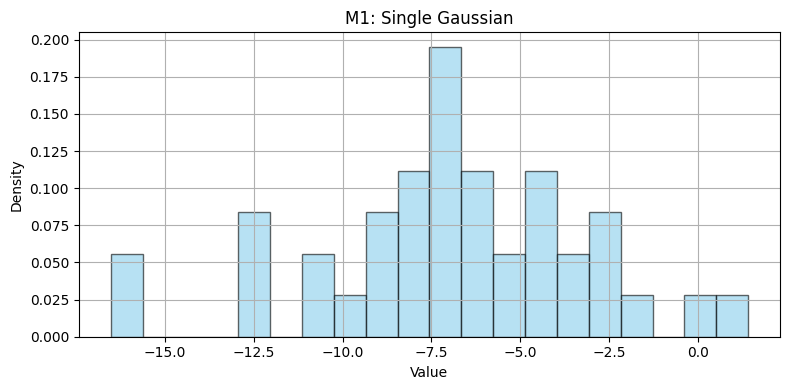

[M2] True: m=0.05, μ1=-1.71, σ1=2.29, μ2=-4.02, σ2=3.03
     Estimated Weights=[0.61222172 0.38777828], μ̂=[-2.19471425 -7.70131553], σ̂=[3.36683978 2.61119589]


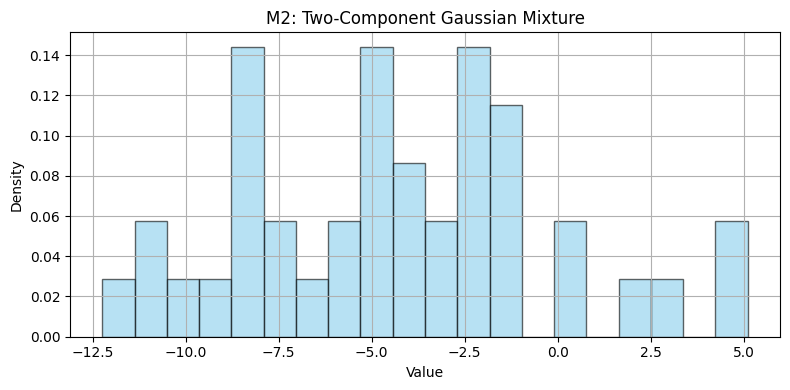

In [16]:
import numpy as np
from scipy.stats import beta as beta_dist, norm
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# ----- Configurable Parameters -----
NUM_POINTS = 40
MU_PRIOR_MEAN = 0
MU_PRIOR_STD = 4
SIGMA_PRIOR_A = 0.5
SIGMA_PRIOR_B = 2.0
MIN_MU_DISTANCE = 2.0

# ----- Helper Functions -----
def sample_single_component_prior(mu_mean=MU_PRIOR_MEAN, mu_std=MU_PRIOR_STD,
                                  sigma_a=SIGMA_PRIOR_A, sigma_b=SIGMA_PRIOR_B):
    mu = np.random.normal(mu_mean, mu_std)
    precision = np.random.gamma(shape=sigma_a, scale=1/sigma_b)
    sigma = np.sqrt(1 / precision)
    return mu, sigma

def generate_m1_sample(num_points=NUM_POINTS):
    mu, sigma = sample_single_component_prior()
    data = np.random.normal(mu, sigma, num_points)
    return data, (mu, sigma)

def sample_mixture_prior(mu_mean=MU_PRIOR_MEAN, mu_std=MU_PRIOR_STD,
                          sigma_a=SIGMA_PRIOR_A, sigma_b=SIGMA_PRIOR_B,
                          min_mu_distance=MIN_MU_DISTANCE):
    m = beta_dist.rvs(0.5, 0.5)
    mu1, sigma1 = sample_single_component_prior(mu_mean, mu_std, sigma_a, sigma_b)
    while True:
        mu2, sigma2 = sample_single_component_prior(mu_mean, mu_std, sigma_a, sigma_b)
        if abs(mu1 - mu2) >= min_mu_distance:
            break
    return m, mu1, sigma1, mu2, sigma2

def generate_m2_sample(num_points=NUM_POINTS):
    m, mu1, sigma1, mu2, sigma2 = sample_mixture_prior()
    data = np.empty(num_points)
    for i in range(num_points):
        if np.random.rand() < m:
            data[i] = np.random.normal(mu1, sigma1)
        else:
            data[i] = np.random.normal(mu2, sigma2)
    return data, (m, mu1, sigma1, mu2, sigma2)

# ----- Estimation Methods -----
def estimate_single_component(data):
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    return mu_hat, sigma_hat

def estimate_two_component_em(data):
    gm = GaussianMixture(n_components=2, random_state=0)
    gm.fit(data.reshape(-1, 1))
    weights = gm.weights_
    mus = gm.means_.flatten()
    sigmas = np.sqrt(gm.covariances_.flatten())
    return weights, mus, sigmas

# ----- Visualization -----
def plot_histogram(data, title="Histogram of Generated Data"):
    plt.figure(figsize=(8, 4))
    plt.hist(data, bins=20, density=True, alpha=0.6, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ----- Example Usage -----
if __name__ == "__main__":
    # M1 example
    data1, (true_mu1, true_sigma1) = generate_m1_sample()
    mu_hat, sigma_hat = estimate_single_component(data1)
    print(f"[M1] True: μ={true_mu1:.2f}, σ={true_sigma1:.2f} | Estimated: μ̂={mu_hat:.2f}, σ̂={sigma_hat:.2f}")
    plot_histogram(data1, title="M1: Single Gaussian")

    # M2 example
    data2, (true_m, true_mu1, true_sigma1, true_mu2, true_sigma2) = generate_m2_sample()
    weights, mus, sigmas = estimate_two_component_em(data2)
    print(f"[M2] True: m={true_m:.2f}, μ1={true_mu1:.2f}, σ1={true_sigma1:.2f}, μ2={true_mu2:.2f}, σ2={true_sigma2:.2f}")
    print(f"     Estimated Weights={weights}, μ̂={mus}, σ̂={sigmas}")
    plot_histogram(data2, title="M2: Two-Component Gaussian Mixture")

Δμ = 1, MLE = 0.90, BIC = 0.16, Bayes = 0.44
Δμ = 2, MLE = 0.84, BIC = 0.10, Bayes = 0.44
Δμ = 3, MLE = 0.92, BIC = 0.14, Bayes = 0.38
Δμ = 4, MLE = 0.98, BIC = 0.26, Bayes = 0.62


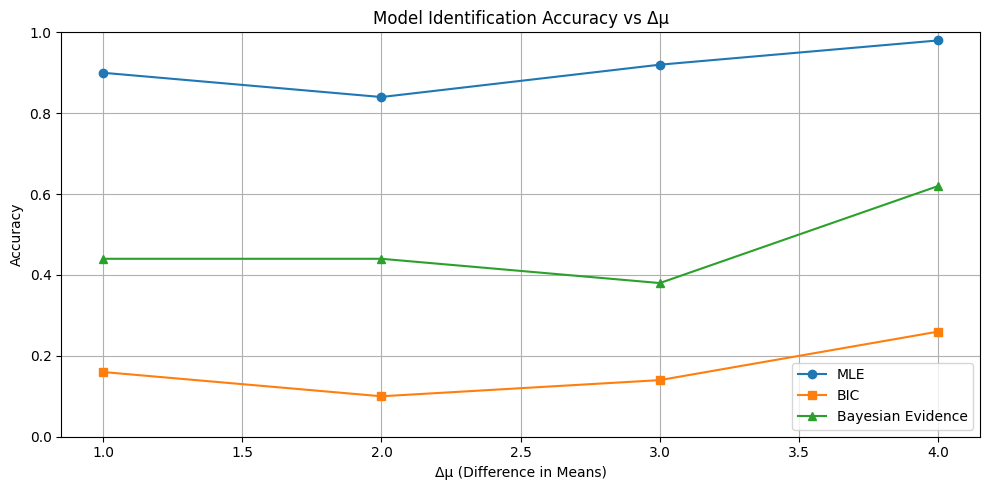

In [20]:
import numpy as np
from scipy.stats import beta as beta_dist, norm
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# ----- Configurable Parameters -----
NUM_POINTS = 40
MU_PRIOR_MEAN = 0
MU_PRIOR_STD = 4
SIGMA_PRIOR_A = 0.5
SIGMA_PRIOR_B = 2.0
NUM_INTEGRAL_SAMPLES = 5000

# ----- Helper Functions -----
def sample_single_component_prior(mu_mean=MU_PRIOR_MEAN, mu_std=MU_PRIOR_STD,
                                  sigma_a=SIGMA_PRIOR_A, sigma_b=SIGMA_PRIOR_B):
    mu = np.random.normal(mu_mean, mu_std)
    precision = np.random.gamma(shape=sigma_a, scale=1/sigma_b)
    sigma = np.sqrt(1 / precision)
    return mu, sigma

def generate_m2_sample_with_delta_mu(delta_mu, num_points=NUM_POINTS):
    m = beta_dist.rvs(0.5, 0.5)
    mu1, sigma1 = sample_single_component_prior()
    shift = delta_mu if np.random.rand() < 0.5 else -delta_mu
    mu2 = mu1 + shift
    sigma2 = np.sqrt(1 / np.random.gamma(shape=SIGMA_PRIOR_A, scale=1/SIGMA_PRIOR_B))

    data = np.empty(num_points)
    for i in range(num_points):
        if np.random.rand() < m:
            data[i] = np.random.normal(mu1, sigma1)
        else:
            data[i] = np.random.normal(mu2, sigma2)
    return data, (m, mu1, sigma1, mu2, sigma2)

def log_likelihood_single(data):
    mu_hat = np.mean(data)
    sigma_hat = np.std(data, ddof=1)
    ll = np.sum(norm.logpdf(data, mu_hat, sigma_hat))
    return ll

def log_likelihood_mixture(data):
    gm = GaussianMixture(n_components=2, random_state=0)
    gm.fit(data.reshape(-1, 1))
    return gm.score(data.reshape(-1, 1)) * len(data)

def bic(log_likelihood, num_params, num_points):
    return -2 * log_likelihood + num_params * np.log(num_points)

def estimate_evidence_single(data):
    evidence = 0
    for _ in range(NUM_INTEGRAL_SAMPLES):
        mu, sigma = sample_single_component_prior()
        evidence += np.prod(norm.pdf(data, mu, sigma))
    return evidence / NUM_INTEGRAL_SAMPLES

def estimate_evidence_mixture(data):
    evidence = 0
    for _ in range(NUM_INTEGRAL_SAMPLES):
        m = beta_dist.rvs(0.5, 0.5)
        mu1, sigma1 = sample_single_component_prior()
        mu2, sigma2 = sample_single_component_prior()
        l = m * norm.pdf(data, mu1, sigma1) + (1 - m) * norm.pdf(data, mu2, sigma2)
        evidence += np.prod(l)
    return evidence / NUM_INTEGRAL_SAMPLES

def run_simulation(delta_mu_values=[1, 2, 3, 4], trials_per_mu=50):
    results = {"Δμ": [], "MLE": [], "BIC": [], "Bayes": []}
    for delta_mu in delta_mu_values:
        correct_mle = 0
        correct_bic = 0
        correct_bayes = 0
        for _ in range(trials_per_mu):
            data, true_params = generate_m2_sample_with_delta_mu(delta_mu)
            ll1 = log_likelihood_single(data)
            ll2 = log_likelihood_mixture(data)

            mle_pred = 2 if ll2 > ll1 else 1
            if mle_pred == 2:
                correct_mle += 1

            bic1 = bic(ll1, 2, len(data))
            bic2 = bic(ll2, 5, len(data))
            bic_pred = 2 if bic2 < bic1 else 1
            if bic_pred == 2:
                correct_bic += 1

            ev1 = estimate_evidence_single(data)
            ev2 = estimate_evidence_mixture(data)
            bayes_pred = 2 if ev2 > ev1 else 1
            if bayes_pred == 2:
                correct_bayes += 1

        results["Δμ"].append(delta_mu)
        results["MLE"].append(correct_mle / trials_per_mu)
        results["BIC"].append(correct_bic / trials_per_mu)
        results["Bayes"].append(correct_bayes / trials_per_mu)
        print(f"Δμ = {delta_mu}, MLE = {results['MLE'][-1]:.2f}, BIC = {results['BIC'][-1]:.2f}, Bayes = {results['Bayes'][-1]:.2f}")

    # Plot results
    x = np.array(results["Δμ"])
    plt.figure(figsize=(10, 5))
    plt.plot(x, results["MLE"], marker='o', label='MLE')
    plt.plot(x, results["BIC"], marker='s', label='BIC')
    plt.plot(x, results["Bayes"], marker='^', label='Bayesian Evidence')
    plt.title("Model Identification Accuracy vs Δμ")
    plt.xlabel("Δμ (Difference in Means)")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ----- Run Experiment -----
if __name__ == "__main__":
    run_simulation()

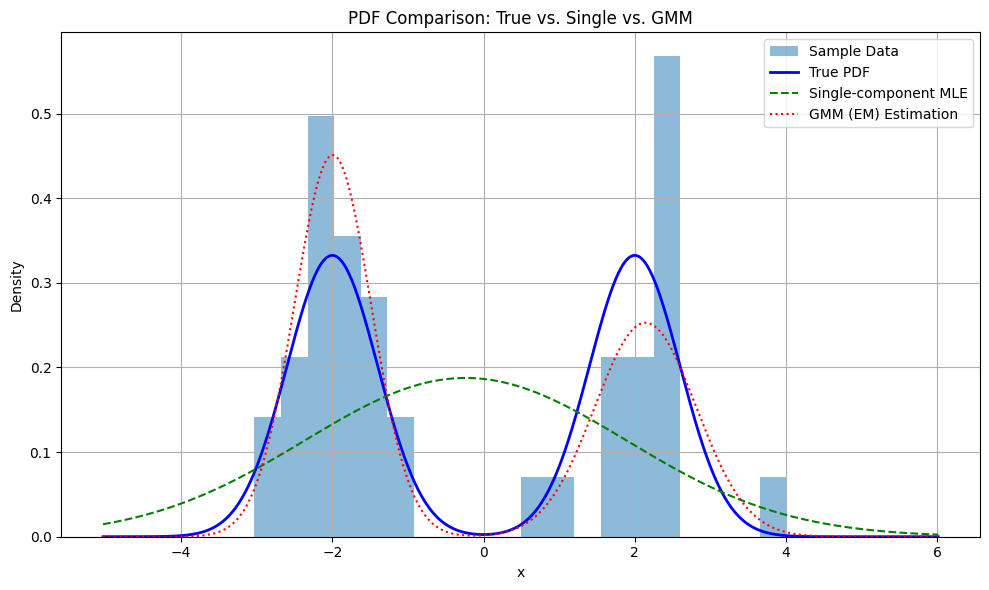

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

# ===== 模擬資料參數：真實雙高斯混合模型 =====
n = 40  # 資料點數
m_true = 0.5
mu1_true, sigma1_true = -2, 0.6
mu2_true, sigma2_true = 2, 0.6

# 選擇成分並生成資料
component_choices = np.random.rand(n) < m_true
data = np.where(component_choices,
                np.random.normal(mu1_true, sigma1_true, n),
                np.random.normal(mu2_true, sigma2_true, n))

# ===== 單一成分模型 MLE =====
mu_mle = np.mean(data)
sigma_mle = np.std(data)

# ===== 雙成分模型估計：GMM (EM 實作) =====
gmm = GaussianMixture(n_components=2)
gmm.fit(data.reshape(-1, 1))
means_gmm = gmm.means_.flatten()
sigmas_gmm = np.sqrt(gmm.covariances_).flatten()
weights_gmm = gmm.weights_

# ===== 畫圖 =====
x = np.linspace(min(data)-2, max(data)+2, 1000)

# 真實分布
true_pdf = (
    m_true * norm.pdf(x, mu1_true, sigma1_true)
    + (1 - m_true) * norm.pdf(x, mu2_true, sigma2_true)
)

# 單一估計分布
mle_pdf = norm.pdf(x, mu_mle, sigma_mle)

# 雙成分估計分布
gmm_pdf = sum(
    w * norm.pdf(x, m, s)
    for w, m, s in zip(weights_gmm, means_gmm, sigmas_gmm)
)

# ===== 繪圖展示 =====
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, density=True, alpha=0.5, label='Sample Data')
plt.plot(x, true_pdf, label='True PDF', color='blue', linewidth=2)
plt.plot(x, mle_pdf, label='Single-component MLE', color='green', linestyle='--')
plt.plot(x, gmm_pdf, label='GMM (EM) Estimation', color='red', linestyle=':')
plt.title('PDF Comparison: True vs. Single vs. GMM')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("pdf_comparison_plot.png")  # 儲存為圖檔方便插入報告
plt.show()
